In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

D:\Python\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
tickers = ['MSFT','AAPL', 'GE', 'ENPH', 'TSLA']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2019-07-05')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-07-05 to 2020-07-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    253 non-null    float64
 1   AAPL    253 non-null    float64
 2   GE      253 non-null    float64
 3   ENPH    253 non-null    float64
 4   TSLA    253 non-null    float64
dtypes: float64(5)
memory usage: 11.9 KB


In [5]:
mydata.head()

,MSFT,AAPL,GE,ENPH,TSLA
Date,,,,,
2019-07-05,135.393936,201.821350,10.453092,19.639999,233.100006
2019-07-08,135.295151,197.661011,10.154432,19.969999,230.339996
2019-07-09,134.801239,198.866638,10.204209,20.420000,230.059998
2019-07-10,136.174347,200.833160,10.154432,19.889999,238.919998
2019-07-11,136.717636,199.370621,10.064835,19.480000,238.600006


In [6]:
mydata.tail()

,MSFT,AAPL,GE,ENPH,TSLA
Date,,,,,
2020-06-29,198.440002,361.779999,6.80,47.450001,1009.349976
2020-06-30,203.509995,364.799988,6.83,47.570000,1079.810059
2020-07-01,204.699997,364.109985,6.74,49.060001,1119.630005
2020-07-02,206.259995,364.109985,6.82,48.860001,1208.660034
2020-07-06,210.699997,373.850006,7.00,50.160000,1371.579956


In [7]:
mydata.iloc[0]

MSFT    135.393936
AAPL    201.821350
GE       10.453092
ENPH     19.639999
TSLA    233.100006
Name: 2019-07-05 00:00:00, dtype: float64

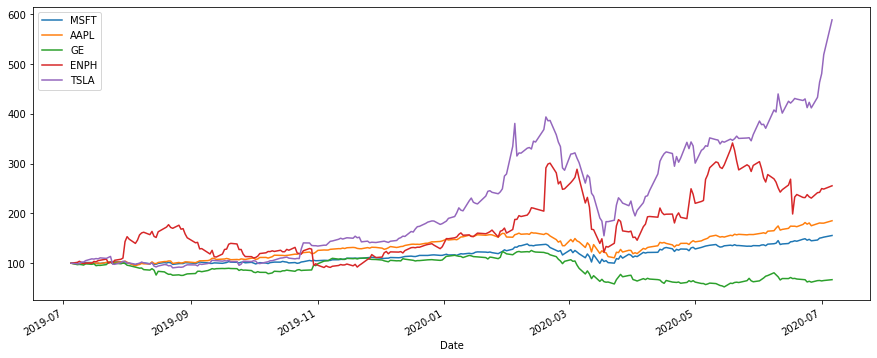

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [9]:
returns = (mydata/mydata.shift(1))- 1 
returns.head()

,MSFT,AAPL,GE,ENPH,TSLA
Date,,,,,
2019-07-05,NaN,NaN,NaN,NaN,NaN
2019-07-08,-0.000730,-0.020614,-0.028571,0.016802,-0.011840
2019-07-09,-0.003651,0.006099,0.004902,0.022534,-0.001216
2019-07-10,0.010186,0.009889,-0.004878,-0.025955,0.038512
2019-07-11,0.003990,-0.007282,-0.008824,-0.020613,-0.001339


In [10]:
weights = np.array([0.22,0.10,0.26,0.15,0.27])

In [13]:
annual_returns = returns.mean()
annual_returns

MSFT    0.002079
AAPL    0.002776
GE     -0.000829
ENPH    0.005990
TSLA    0.008282
dtype: float64

In [14]:
np.dot(annual_returns,weights)

0.0036542315530631946

In [15]:
pfolio_1= str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

0.365 %
